<a href="https://colab.research.google.com/github/ehsanpoorvahedi/Bikesharing/blob/main/Bike_Sharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring New York City Bike Sharing Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Bike Sharing/201707-citibike-tripdata.csv')

In [ ]:
m1 , m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 = len(df1), len(df2), len(df3), len(df4), len(df5), len(df6), len(df7), len(df8), len(df9), len(df10), len(df11), len(df12)
m = [m1 , m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]
print(m)

[726676, 791647, 727665, 1315404, 1523268, 1731594, 1735599, 1816498, 1878098, 1897592, 1330649, 889967]


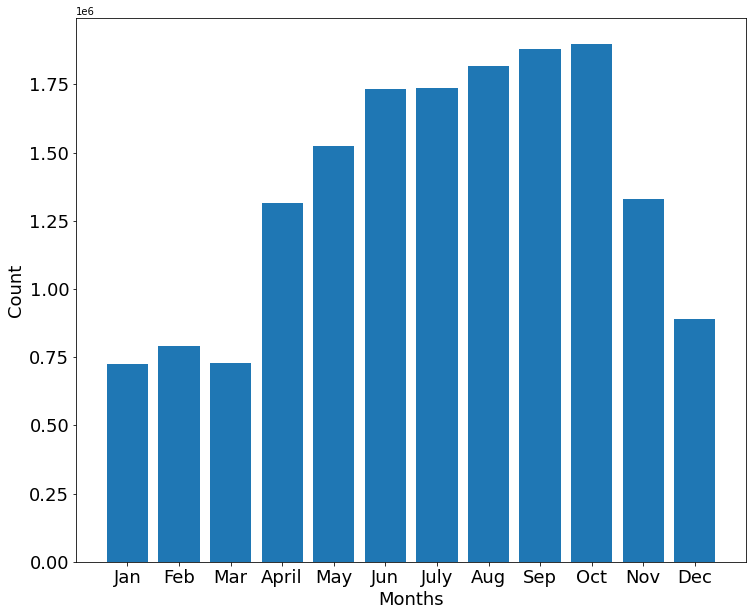

In [ ]:
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
months=['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12,10))
plt.bar(left, m, tick_label = months)
plt.grid(False)
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('/content/drive/My Drive/Bike Sharing/Month Trip.png')
plt.show()

In [ ]:
df = df7


In [ ]:
df.describe().round(2)

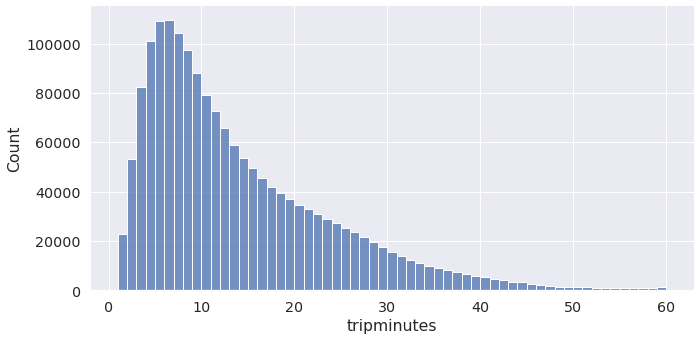

In [ ]:
#Trip Duration
df['tripminutes'] = df['tripduration'] // 60
sns.set(font_scale = 1.3)
tripdistribution = sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5)
tripdistribution.figure.savefig('/content/drive/My Drive/Bike Sharing/Trip Distribution.png') 

In [ ]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [ ]:

df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')


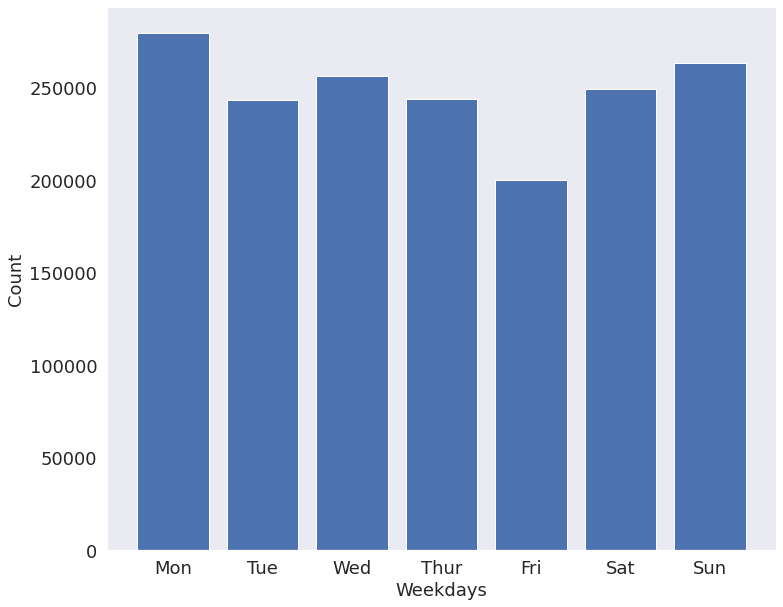

In [ ]:
weekdays=df.value_counts(['weekday'])
weekdays = weekdays.sort_index()
left = [1, 2, 3, 4, 5, 6, 7]
days=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,10))
plt.bar(left, weekdays, tick_label = days)
plt.grid(False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Weekdays',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.savefig('/content/drive/My Drive/Bike Sharing/weekday.png')
plt.show()

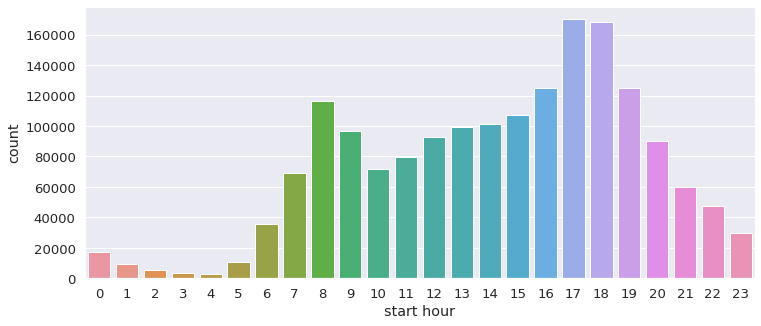

In [ ]:
#Rides by Hour and Day
plt.figure(figsize=(12,5))
sns.set(font_scale = 1.2)
rides_hour= sns.countplot(data=df, x="start hour" )
rides_hour.figure.savefig('/content/drive/My Drive/Bike Sharing/Rides by Hour.png') 

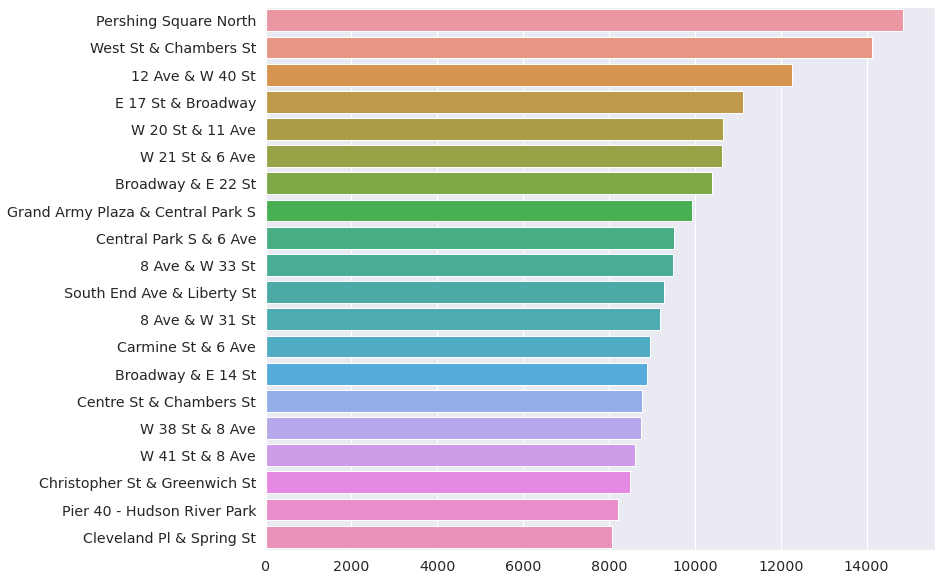

In [ ]:
#Station Use
startstation = df['start station name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
Station_Use= sns.barplot( x=startstation.values , y=list(startstation.index), orient="h"  ) ;
Station_Use.figure.savefig('/content/drive/My Drive/Bike Sharing/Station Use.png') 

<Figure size 864x720 with 0 Axes>

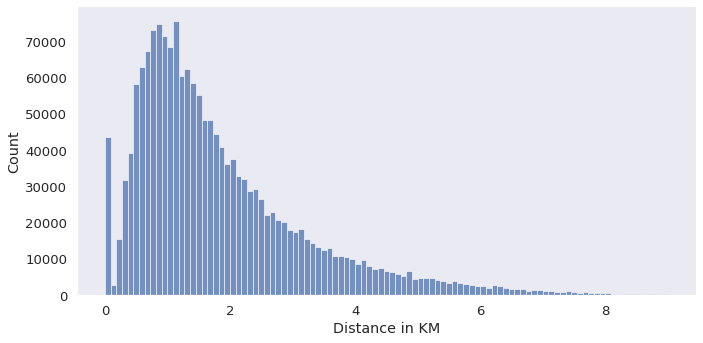

In [ ]:
#Distance
lon1, lat1, lon2, lat2 = map(np.radians, [df['start station longitude'], df['start station latitude'],df['end station longitude'], df['end station latitude']])
dlat = lat2 - lat1 
dlon = lon2 - lon1
a = (np.sin(dlat/2))**2 +np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2 
c = 2 * np.arcsin( np.sqrt(a)) 
d = 6373  * c 
df['distance']=d

plt.figure(figsize=(12,10))
bin = np.linspace(0,9,100)
sns.set(font_scale = 1.2)
sns.displot(data=df,x="distance", bins=bin, aspect=10/5,)

plt.grid(False)
plt.xlabel('Distance in KM')
plt.ylabel('Count')
plt.savefig('/content/drive/My Drive/Bike Sharing/Distance3.png')
plt.show()

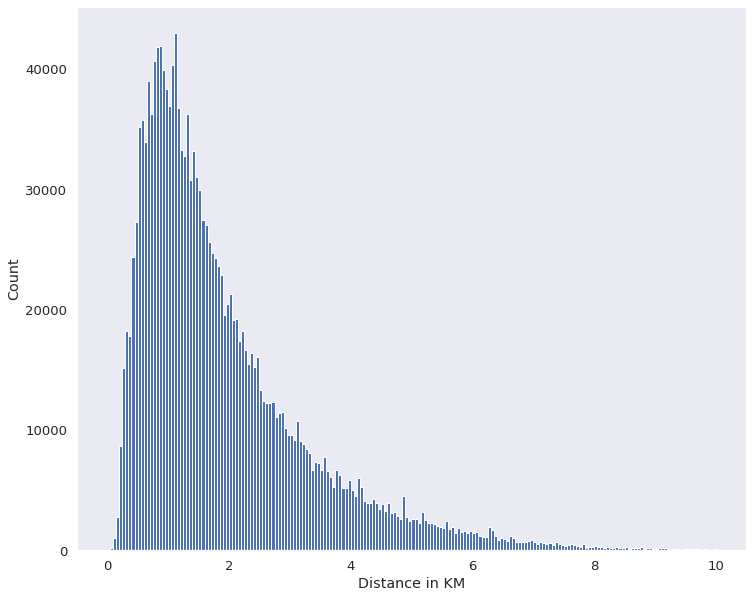

In [ ]:
#Distance/no loops
d = list(filter(lambda d: d !=0 , d)) 
plt.figure(figsize=(12,10))
plt.hist(d, bins=200,range=(0,10))
plt.grid(False)
plt.xlabel('Distance in KM')
plt.ylabel('Count')
plt.savefig('/content/drive/My Drive/Bike Sharing/Distance 1.png')
plt.show()


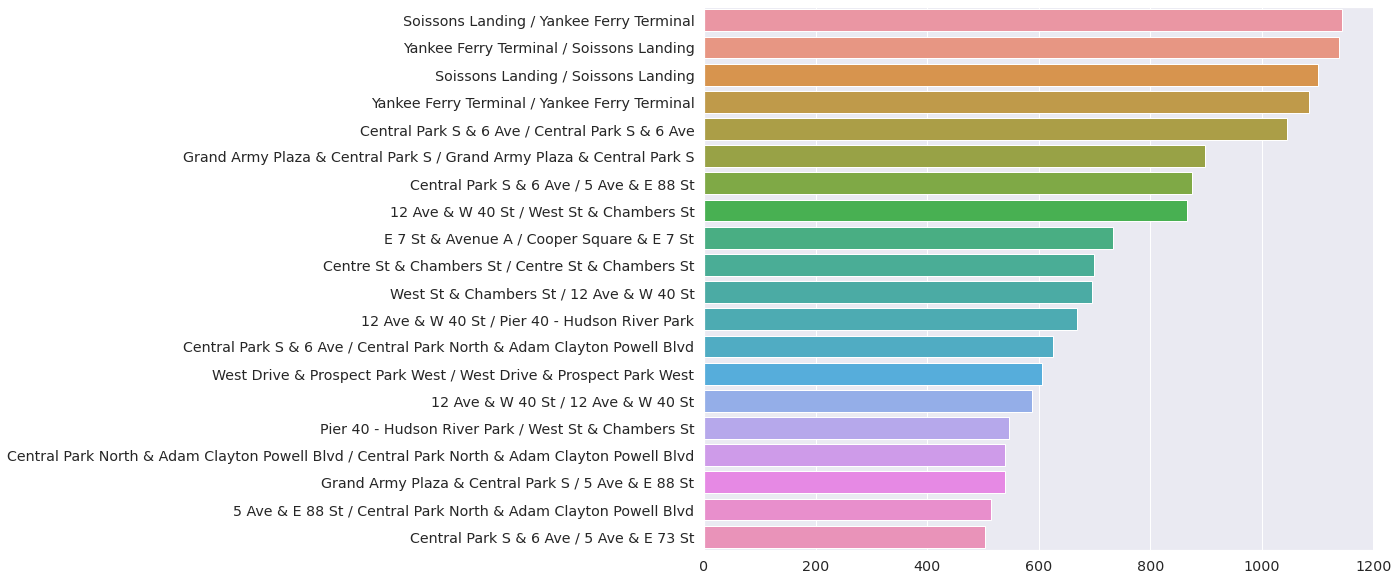

In [ ]:
#Popular Trips
trips=df.value_counts(['start station name','end station name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
populartrips = sns.barplot( x= list(trips.values), y = trip_names, orient="h")
populartrips.figure.savefig('/content/drive/My Drive/Bike Sharing/Popular Trips.png',bbox_inches='tight')

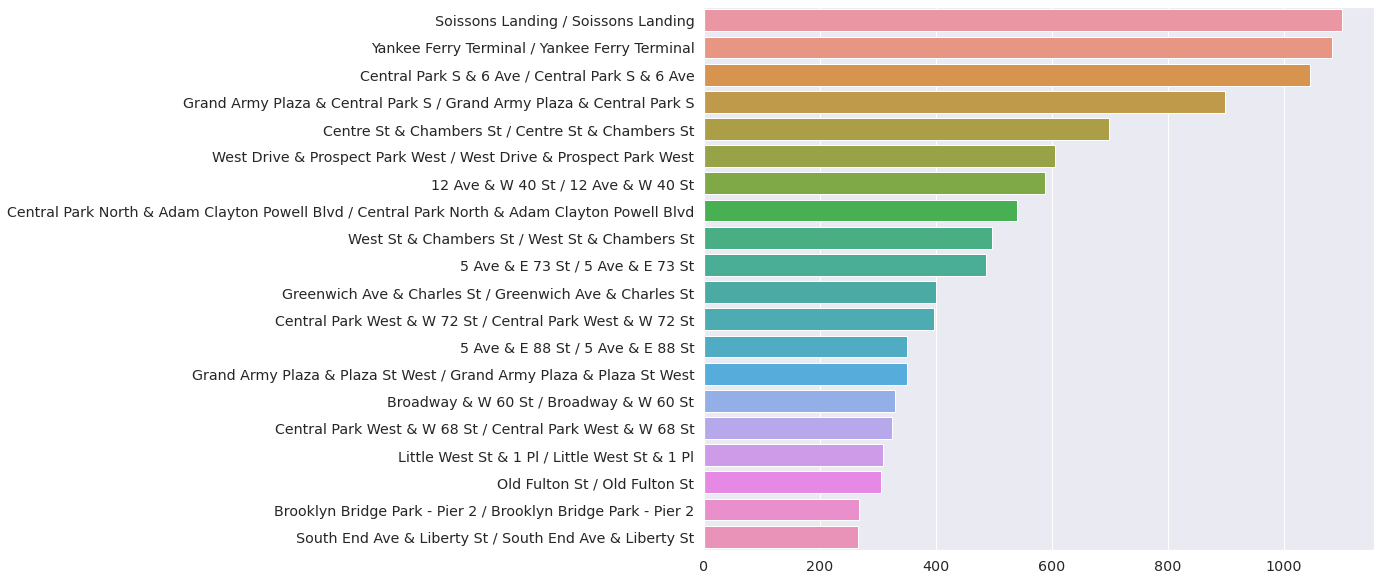

In [ ]:
#Popular trips/ no loops
trips = df[df['start station id'] == df['end station id']].value_counts(['start station name','end station name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
sns.barplot( x= list(trips.values), y = trip_names, orient="h")
plt.savefig('/content/drive/My Drive/Bike Sharing/Popular Trips 2.png',bbox_inches='tight')

In [ ]:
trips_central_park= df[['start station name','end station name']].loc[((df['start station name']=='Central Park S & 6 Ave'))].value_counts()
links_central_park=pd.DataFrame.from_records(list(trips_central_park.index),columns=['start','end']) 
links_central_park['trips']=trips_central_park.values
links_central_park


start                                            end  \
0    Central Park S & 6 Ave                         Central Park S & 6 Ave   
1    Central Park S & 6 Ave                                5 Ave & E 88 St   
2    Central Park S & 6 Ave  Central Park North & Adam Clayton Powell Blvd   
3    Central Park S & 6 Ave                                5 Ave & E 73 St   
4    Central Park S & 6 Ave                                5 Ave & E 78 St   
..                      ...                                            ...   
320  Central Park S & 6 Ave                          Bayard St & Baxter St   
321  Central Park S & 6 Ave                        Lispenard St & Broadway   
322  Central Park S & 6 Ave                                W 17 St & 8 Ave   
323  Central Park S & 6 Ave                     McGuinness Blvd & Eagle St   
324  Central Park S & 6 Ave                          Little West St & 1 Pl   

     trips  
0     1045  
1      875  
2      625  
3      503  
4      392  
..     ...  
320      1  
321      1  
322      1  
323      1  
324      1  

[325 rows x 3 columns]

In [ ]:
trips_central_park= df[['start station name','end station name','tripminutes','start hour','distance']].loc[((df['start station name']=='Central Park S & 6 Ave'))]
links_central_park=pd.DataFrame(trips_central_park)
links_central_park

start station name           end station name  tripminutes  \
138      Central Park S & 6 Ave  Cathedral Pkwy & Broadway           25   
1850     Central Park S & 6 Ave     Central Park S & 6 Ave           36   
1866     Central Park S & 6 Ave            W 41 St & 8 Ave           10   
2523     Central Park S & 6 Ave            1 Ave & E 68 St           10   
2625     Central Park S & 6 Ave         E 88 St & Park Ave           17   
...                         ...                        ...          ...   
1734392  Central Park S & 6 Ave    West End Ave & W 107 St           25   
1734539  Central Park S & 6 Ave            E 20 St & 2 Ave           27   
1734828  Central Park S & 6 Ave     Central Park S & 6 Ave           30   
1735141  Central Park S & 6 Ave         Broadway & W 58 St           25   
1735556  Central Park S & 6 Ave            W 11 St & 6 Ave           30   

        start hour  distance  
138              0  4.332674  
1850             6  0.000000  
1866             6  1.564206  
2523             7  1.532891  
2625             8  2.433232  
...            ...       ...  
1734392         22  4.085643  
1734539         22  3.374976  
1734828         23  0.000000  
1735141         23  0.465563  
1735556         23  3.860749  

[9513 rows x 5 columns]

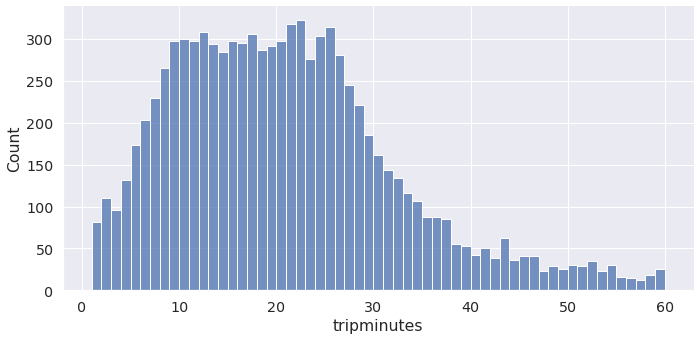

In [ ]:
sns.set(font_scale = 1.3)
tripdistribution = sns.displot(data=links_central_park,x="tripminutes", bins=range(1,61), aspect=10/5)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x720 with 0 Axes>

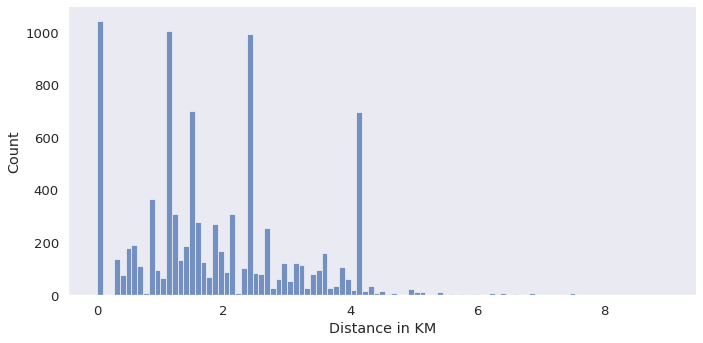

In [ ]:
plt.figure(figsize=(12,10))
bin = np.linspace(0,9,100)
sns.set(font_scale = 1.2)
sns.displot(data=links_central_park,x="distance", bins=bin, aspect=10/5,)

plt.grid(False)
plt.xlabel('Distance in KM')
plt.ylabel('Count')
plt.show

In [ ]:
dfc=pd.merge(links_central_park, df[['tripduration','start hour']],how = 'inner',left_on='start', right_on='start station name')
dfc

KeyError: ignored

In [ ]:
df

tripduration           starttime            stoptime  \
0                 364 2017-07-01 00:00:00 2017-07-01 00:06:05   
1                2142 2017-07-01 00:00:03 2017-07-01 00:35:46   
2                 328 2017-07-01 00:00:08 2017-07-01 00:05:37   
3                2530 2017-07-01 00:00:11 2017-07-01 00:42:22   
4                2534 2017-07-01 00:00:15 2017-07-01 00:42:29   
...               ...                 ...                 ...   
1735594           560 2017-07-31 23:59:33 2017-08-01 00:08:53   
1735595           272 2017-07-31 23:59:35 2017-08-01 00:04:08   
1735596          1211 2017-07-31 23:59:37 2017-08-01 00:19:49   
1735597           547 2017-07-31 23:59:48 2017-08-01 00:08:56   
1735598          1816 2017-07-31 23:59:57 2017-08-01 00:30:13   

         start station id              start station name  \
0                     539  Metropolitan Ave & Bedford Ave   
1                     293           Lafayette St & E 8 St   
2                    3242      Schermerhorn St & Court St   
3                    2002    Wythe Ave & Metropolitan Ave   
4                    2002    Wythe Ave & Metropolitan Ave   
...                   ...                             ...   
1735594              3260         Mercer St & Bleecker St   
1735595               247          Perry St & Bleecker St   
1735596              3303            Butler St & Court St   
1735597               276         Duane St & Greenwich St   
1735598              3091            Frost St & Meeker St   

         start station latitude  start station longitude  end station id  \
0                     40.715348               -73.960241            3107   
1                     40.730207               -73.991026            3425   
2                     40.691029               -73.991834            3397   
3                     40.716887               -73.963198             398   
4                     40.716887               -73.963198             398   
...                         ...                      ...             ...   
1735594               40.727064               -73.996621             236   
1735595               40.735354               -74.004831             434   
1735596               40.684989               -73.994403            3308   
1735597               40.717488               -74.010455             127   
1735598               40.717640               -73.948820             258   

                    end station name  end station latitude  \
0           Bedford Ave & Nassau Ave             40.723117   
1                  2 Ave  & E 104 St             40.789211   
2               Court St & Nelson St             40.676395   
3           Atlantic Ave & Furman St             40.691652   
4           Atlantic Ave & Furman St             40.691652   
...                              ...                   ...   
1735594          St Marks Pl & 2 Ave             40.728419   
1735595              9 Ave & W 18 St             40.743174   
1735596         Kane St & Clinton St             40.686176   
1735597        Barrow St & Hudson St             40.731724   
1735598  DeKalb Ave & Vanderbilt Ave             40.689407   

         end station longitude  bikeid    usertype  birth year  gender  \
0                   -73.952123   14744  Subscriber      1986.0       1   
1                   -73.943708   19587  Subscriber      1981.0       1   
2                   -73.998699   27937  Subscriber      1984.0       2   
3                   -73.999979   26066  Subscriber      1985.0       1   
4                   -73.999979   29408  Subscriber      1982.0       2   
...                        ...     ...         ...         ...     ...   
1735594             -73.987140   16126  Subscriber      1990.0       2   
1735595             -74.003664   27684  Subscriber      1999.0       1   
1735596             -73.996453   28402  Subscriber      1975.0       2   
1735597             -74.006744   30150  Subscriber      1992.0       1   
1735598             -73

In [ ]:
gdf=df[['start station id','start station latitude','start station longitude']].groupby('start station id').max()
print('Unique stations:',gdf.shape[0])
gdf = gdf.reset_index()

gdf

Unique stations: 785


start station id  start station latitude  start station longitude
0                  72               40.767272               -73.993929
1                  79               40.719116               -74.006667
2                  82               40.711174               -74.000165
3                  83               40.683826               -73.976323
4                 116               40.741776               -74.001497
..                ...                     ...                      ...
780              3648               40.697950               -73.970776
781              3649               40.814394               -73.953247
782              3650               45.505851               -73.569109
783              3653               40.758205               -73.928322
784              3654               40.751870               -73.933493

[785 rows x 3 columns]

In [ ]:
gdf=gdf[(gdf['start station latitude']!=0.0) & (gdf['start station longitude']!=0.0) & (gdf['start station latitude']<=41.5)]
minlatitude=np.min(gdf['start station latitude'])
maxlatitude=np.max(gdf['start station latitude'])
minlongitude=np.min(gdf['start station longitude'])
maxlongitude=np.max(gdf['start station longitude'])
print("min and max latitude:",minlatitude,maxlatitude)
print("min and max longitude:",minlongitude,maxlongitude)

min and max latitude: 40.64653836709648 40.88092055523877
min and max longitude: -74.03423398733139 -73.89660179615021


In [ ]:
nyc = plt.imread('/content/drive/My Drive/Bike Sharing/map.png')

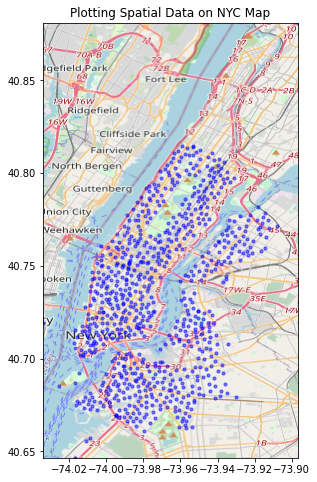

In [ ]:
ex = (minlatitude, maxlatitude, minlongitude, maxlongitude)
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(gdf['start station longitude'], gdf['start station latitude'], zorder=1, alpha= 0.5, c='b', s=10)
ax.set_title('Plotting Spatial Data on NYC Map')
ax.set_xlim(minlongitude,maxlongitude)
ax.set_ylim(minlatitude,maxlatitude)
ax.imshow(nyc, zorder=0, extent=[-74.03423398733139,-73.89660179615021,40.64653836709648,40.88092055523877], aspect= 'equal' )
plt.savefig('/content/drive/My Drive/Bike Sharing/Station Distribution.png')

In [ ]:
stations = df["start station id"].dropna().unique()

distance, count = list(), list()
for s1 in stations[467:]:
    d_row, c_row = list(), list()
    for s2 in stations:
        sdf = df[(df["start station id"] == s1) & (df["end station id"] == s2)]
        c_row.append(len(sdf))
        d = 0
        if len(sdf) > 0:
            
            d = np.average(sdf.distance)
            if np.isnan(d): 
                d = 0
                
            if d > 5: d = 5
        d_row.append(d)
        
    distance.append(d_row)
    count.append(c_row)
    
    
distance = pd.DataFrame(data=distance, index=stations, columns=stations)

count = pd.DataFrame(data=count, index=stations, columns=stations)

ValueError: ignored

In [ ]:
count3= pd.DataFrame(count)
count3 = count3.drop([0,1])
count3

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
2      0    5    0    0    0   26  362    0    4   28  ...    0    2    0   
3      0    1    0    0    0    6   13    0    1   35  ...    0    0    0   
4      6   18    0    9   34    2    0    4   11    6  ...    1    0    0   
5     22   30   83   44    5    0    0    3    4    0  ...    8    0    0   
6      1   39    0    3    9  145   22    1   44  207  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
313    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
314    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
315    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
316    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
317    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     778  779  780  781  782  783  784  
2      0    2    0    0    0    0    0  
3      1    1    0    0    0    0    0  
4      0    0    0    0    0    0    0  
5      0    0    0    0    0    0    0  
6      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
313    0    0   65    0    0    0    0  
314    0    0    0    3    3    0    0  
315    0    0    0    2    0    0    0  
316    0    0    0    0    0    0    0  
317    0    0    0    0    0    0    0  

[316 rows x 785 columns]

In [ ]:
count2

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0    322   11    9  228   18    2    0  132   15    1  ...   11    0    0   
1     17  497   14    9  103   28    8    4  476   25  ...    0    0    0   
2      7    7   98    5    2    1    0    0    0    0  ...    2    0    0   
3    277   15   13  325   21    2    0  150    7    1  ...    8    0    0   
4     31  111    5   17  400    9    0   12  129    4  ...    3    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
464   18    3   12    8    0    0    0   12    1    0  ...    3    0    0   
465   27    2    0   13    3    0    0    5    0    0  ...    0    0    0   
466   97    2    0  192    1    0    0   87    1    0  ...    0    0    0   
467    2    2   65    4    7    0    0    0    0    0  ...    0    0    0   
468    0    8    1    0    1   22    3    0    1  123  ...    0    0    0   

     778  779  780  781  782  783  784  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
464    0    0    0    0    0    0    0  
465    0    0    0    0    0    0    0  
466    0    0    0    0    0    0    0  
467    0    0    0    0    0    0    0  
468    0    0    0    0    0    0    0  

[469 rows x 785 columns]

In [ ]:
count4 = count2.append(count3)
count4 = count4.reset_index()
count4 = count4.drop(columns='index')
count4

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0    322   11    9  228   18    2    0  132   15    1  ...   11    0    0   
1     17  497   14    9  103   28    8    4  476   25  ...    0    0    0   
2      7    7   98    5    2    1    0    0    0    0  ...    2    0    0   
3    277   15   13  325   21    2    0  150    7    1  ...    8    0    0   
4     31  111    5   17  400    9    0   12  129    4  ...    3    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
780    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
781    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
782    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
783    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
784    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     778  779  780  781  782  783  784  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
780    0    0   65    0    0    0    0  
781    0    0    0    3    3    0    0  
782    0    0    0    2    0    0    0  
783    0    0    0    0    0    0    0  
784    0    0    0    0    0    0    0  

[785 rows x 785 columns]

In [ ]:
count4.to_csv('/content/drive/My Drive/Bike Sharing/OD Stations.csv')

In [ ]:
count5 = count4.values.tolist()

In [ ]:
count = pd.DataFrame(data=count)
count1 = count
count2= count.copy()
count2

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0    322   11    9  228   18    2    0  132   15    1  ...   11    0    0   
1     17  497   14    9  103   28    8    4  476   25  ...    0    0    0   
2      7    7   98    5    2    1    0    0    0    0  ...    2    0    0   
3    277   15   13  325   21    2    0  150    7    1  ...    8    0    0   
4     31  111    5   17  400    9    0   12  129    4  ...    3    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
464   18    3   12    8    0    0    0   12    1    0  ...    3    0    0   
465   27    2    0   13    3    0    0    5    0    0  ...    0    0    0   
466   97    2    0  192    1    0    0   87    1    0  ...    0    0    0   
467    2    2   65    4    7    0    0    0    0    0  ...    0    0    0   
468    0    8    1    0    1   22    3    0    1  123  ...    0    0    0   

     778  779  780  781  782  783  784  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
464    0    0    0    0    0    0    0  
465    0    0    0    0    0    0    0  
466    0    0    0    0    0    0    0  
467    0    0    0    0    0    0    0  
468    0    0    0    0    0    0    0  

[469 rows x 785 columns]

Text(204.0, 0.5, 'Starting stations')

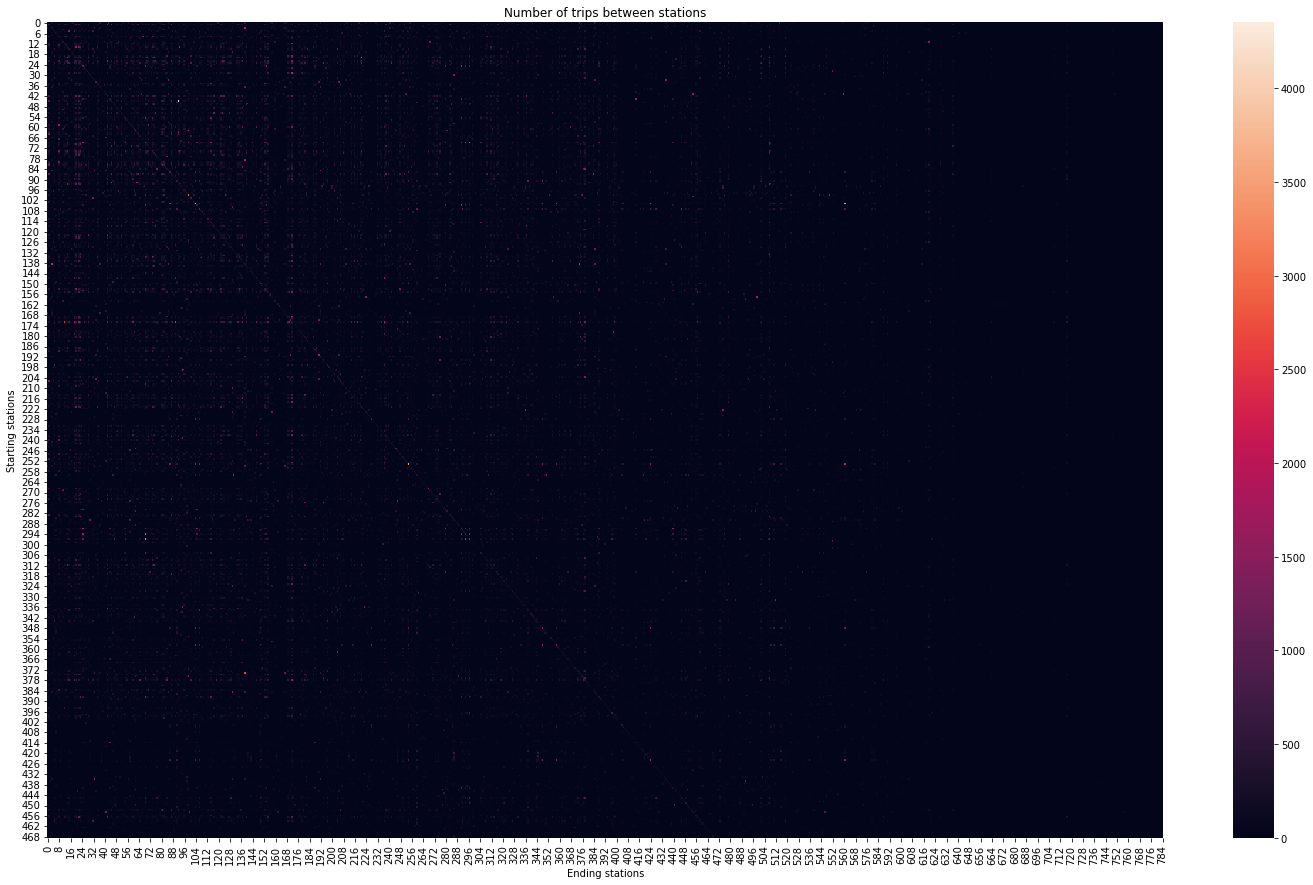

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(count)
plt.title("Number of trips between stations")
plt.xlabel("Ending stations")
plt.ylabel("Starting stations")

In [ ]:
dftrips = df[['start station id','end station id']]
dftrips

start station id  end station id
0                     539            3107
1                     293            3425
2                    3242            3397
3                    2002             398
4                    2002             398
...                   ...             ...
1735594              3260             236
1735595               247             434
1735596              3303            3308
1735597               276             127
1735598              3091             258

[1735599 rows x 2 columns]

In [ ]:
#OD stations
trips = df[['start station id','end station id']].value_counts()
OD=pd.DataFrame.from_records(list(trips.index),columns=['start station id','end station id']) 
OD['trips']=trips.values
OD_stations = pd.pivot_table(OD,index='start station id',values='trips',columns='end station id')
OD_stations = OD_stations.fillna(0)
OD_stations.to_csv('/content/drive/My Drive/Bike Sharing/OD Stations.csv')
OD_stations

end station id     72    79    82    83    116   119   120   127   128   143   \
start station id                                                                
72                102.0   4.0   0.0   0.0   6.0   0.0   0.0  19.0   4.0   1.0   
79                  6.0  40.0   0.0   1.0   4.0   0.0   1.0  25.0  22.0   0.0   
82                  0.0   1.0  51.0   0.0   1.0   2.0   0.0   0.0   8.0   0.0   
83                  0.0   0.0   0.0  24.0   0.0   1.0  18.0   0.0   0.0   8.0   
116                 6.0  13.0   0.0   0.0  52.0   0.0   1.0  47.0  18.0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3472               36.0   3.0   0.0   0.0   9.0   0.0   0.0  25.0  18.0   0.0   
3474                1.0   9.0   0.0   0.0  13.0   0.0   0.0  17.0  12.0   0.0   
3476                0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   
3477                0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   
3478                0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

end station id    ...  3464  3466  3468  3469  3470  3472  3474  3476  3477  \
start station id  ...                                                         
72                ...   4.0  16.0   0.0   0.0   0.0  25.0   3.0   0.0   0.0   
79                ...   0.0   0.0   0.0   0.0   0.0   7.0   9.0   0.0   0.0   
82                ...   0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   
83                ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
116               ...  11.0   2.0   0.0   0.0   0.0  13.0   5.0   0.0   0.0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3472              ...   4.0   1.0   0.0   0.0   0.0  72.0  13.0   0.0   0.0   
3474              ...   1.0   7.0   0.0   0.0   0.0  13.0  29.0   0.0   0.0   
3476              ...   0.0   0.0   0.0   4.0   0.0   0.0   0.0  26.0   0.0   
3477              ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  16.0   
3478              ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  18.0   

end station id    3478  
start station id        
72                 0.0  
79                 0.0  
82                 0.0  
83                 0.0  
116                0.0  
...                ...  
3472               0.0  
3474               0.0  
3476               0.0  
3477              12.0  
3478              28.0  

[623 rows x 634 columns]

In [ ]:
dfstations=pd.read_parquet('/content/drive/My Drive/Bike Sharing/202009-stations.parquet')
dfstations = dfstations.rename(columns={'boro':'borough'})
dfstations

neighborhood    borough zipcode                     station name  \
stationid                                                                     
3508             Harlem  Manhattan   10027  St Nicholas Ave & Manhattan Ave   
3621            Astoria     Queens   11102                    27 Ave & 9 St   
3492        East Harlem  Manhattan   10035              E 118 St & Park Ave   
3946             Harlem  Manhattan   10040       St Nicholas Ave & W 137 St   
3081                NaN   Brooklyn   11206            Graham Ave & Grand St   
...                 ...        ...     ...                              ...   
4159       Bronx County  The Bronx   10457                 3 Ave & E 172 St   
4161       Bronx County  The Bronx   10457                 3 Ave & E 174 St   
4202       Bronx County  The Bronx   10459        Dawson St & Intervale Ave   
4140       Bronx County  The Bronx   10459             E 163 St & Union Ave   
4195       Bronx County  The Bronx   10456              E 167 St & Clay Ave   

            latitude  longitude  
stationid                        
3508       40.809725 -73.953149  
3621       40.773983 -73.930913  
3492       40.800539 -73.941995  
3946       40.818477 -73.947568  
3081       40.711863 -73.944024  
...              ...        ...  
4159       40.839586 -73.900277  
4161       40.842240 -73.898500  
4202       40.819999 -73.897263  
4140       40.822545 -73.901824  
4195       40.830940 -73.911250  

[1087 rows x 6 columns]

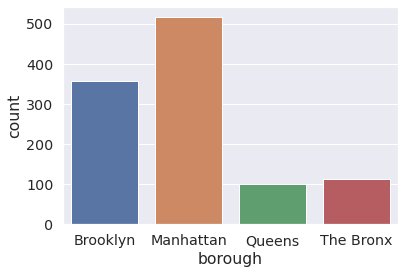

In [ ]:
sns.set(font_scale = 1.3)
sns.countplot(data=dfstations, x="borough")
plt.savefig('/content/drive/My Drive/Bike Sharing/Number of Stations.png',bbox_inches='tight')

In [ ]:
dfa

start station id  end station id    borough     neighborhood zipcode
0                     539            3107   Brooklyn       Greenpoint   11249
1                     539             258   Brooklyn       Greenpoint   11249
2                     539            3081   Brooklyn       Greenpoint   11249
3                     539            3116   Brooklyn       Greenpoint   11249
4                     539            3111   Brooklyn       Greenpoint   11249
...                   ...             ...        ...              ...     ...
1474855              3437            3167  Manhattan  Upper West Side   10024
1474856              3437            3383  Manhattan  Upper West Side   10024
1474857              3437             492  Manhattan  Upper West Side   10024
1474858              3437            3437  Manhattan  Upper West Side   10024
1474859              3437            3170  Manhattan  Upper West Side   10024

[1474860 rows x 5 columns]

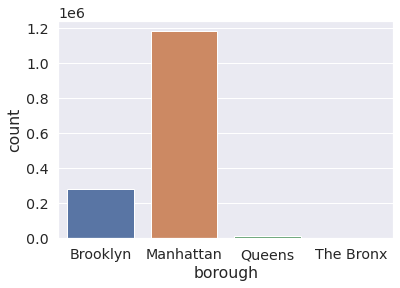

In [ ]:
dfa=pd.merge(dftrips, dfstations[['borough','neighborhood','zipcode']],how = 'inner',left_on='start station id', right_on='stationid')
sns.set(font_scale = 1.3)
sns.countplot(data=dfa, x="borough")
plt.savefig('/content/drive/My Drive/Bike Sharing/Boro.png',bbox_inches='tight')


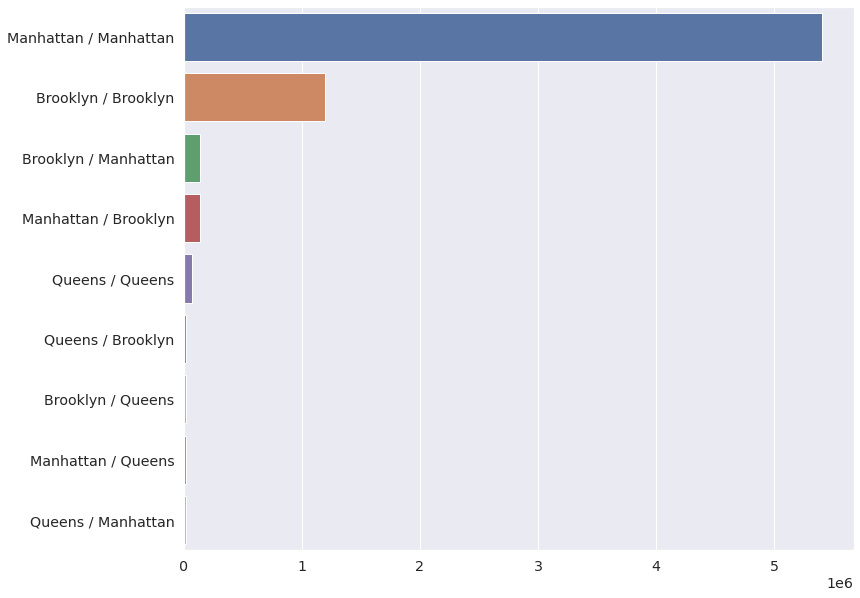

In [ ]:

trips=dfb.value_counts(['borough_x','borough_y'])[:10]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips)) ]
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
sns.barplot(x= list(trips.values), y = trip_names, orient="h")

plt.savefig('/content/drive/My Drive/Bike Sharing/OD Boro.png',bbox_inches='tight')

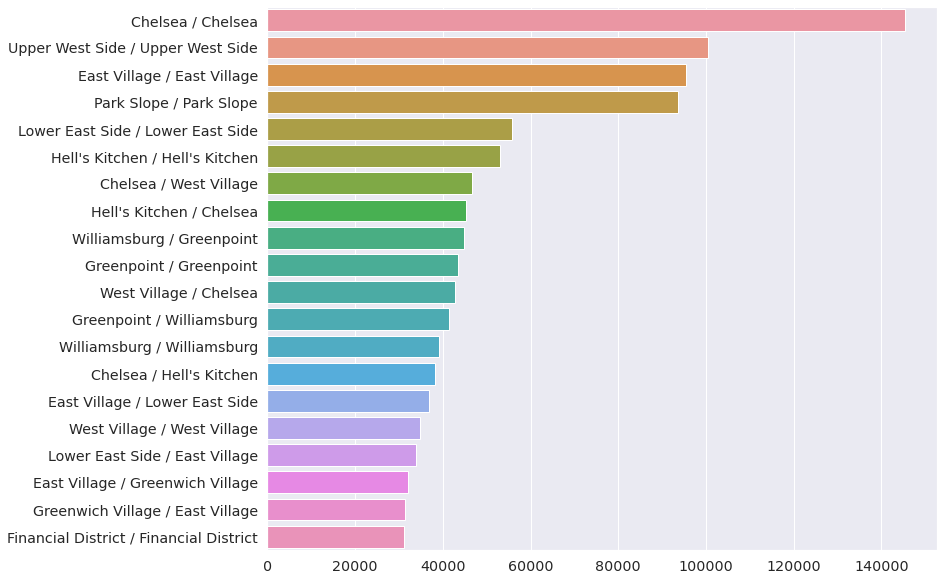

In [ ]:
dfb=pd.merge(dfa, dfstations[['borough','neighborhood','zipcode']],how='left',left_on='end station id', right_on='stationid')
trips=dfb.value_counts(['neighborhood_x','neighborhood_y'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips)) ]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names)
plt.savefig('/content/drive/My Drive/Bike Sharing/OD neighbourhood.png',bbox_inches='tight')

In [ ]:
trips_Manhattan=dfb[['neighborhood_x','neighborhood_y']].loc[((dfb['borough_x']=='Manhattan')&(dfb['borough_y']=='Manhattan'))].value_counts()
links_Manhattan=pd.DataFrame.from_records(list(trips_Manhattan.index),columns=['start','end']) 
links_Manhattan['trips']=trips_Manhattan.values
links_Manhattan.head(10)

start              end   trips
0          Chelsea          Chelsea  145441
1  Upper West Side  Upper West Side  100449
2     East Village     East Village   95563
3  Lower East Side  Lower East Side   55733
4   Hell's Kitchen   Hell's Kitchen   52941
5          Chelsea     West Village   46687
6   Hell's Kitchen          Chelsea   45341
7     West Village          Chelsea   42755
8          Chelsea   Hell's Kitchen   38266
9     East Village  Lower East Side   36872

In [ ]:
trips_Brooklyn=dfb[['neighborhood_x','neighborhood_y']].loc[((dfb['borough_x']=='Brooklyn')&(dfb['borough_y']=='Brooklyn'))].value_counts()
links_Brooklyn=pd.DataFrame.from_records(list(trips_Brooklyn.index),columns=['start','end']) 
links_Brooklyn['trips']=trips_Brooklyn.values
links_Brooklyn.head(10)

start                 end  trips
0          Park Slope          Park Slope  93560
1        Williamsburg          Greenpoint  44811
2          Greenpoint          Greenpoint  43532
3          Greenpoint        Williamsburg  41420
4        Williamsburg        Williamsburg  39076
5         Fort Greene   Downtown Brooklyn  20207
6         Fort Greene         Fort Greene  17649
7   Downtown Brooklyn         Fort Greene  16264
8  Bedford-Stuyvesant  Bedford-Stuyvesant  13775
9    Brooklyn Heights    Brooklyn Heights  12922

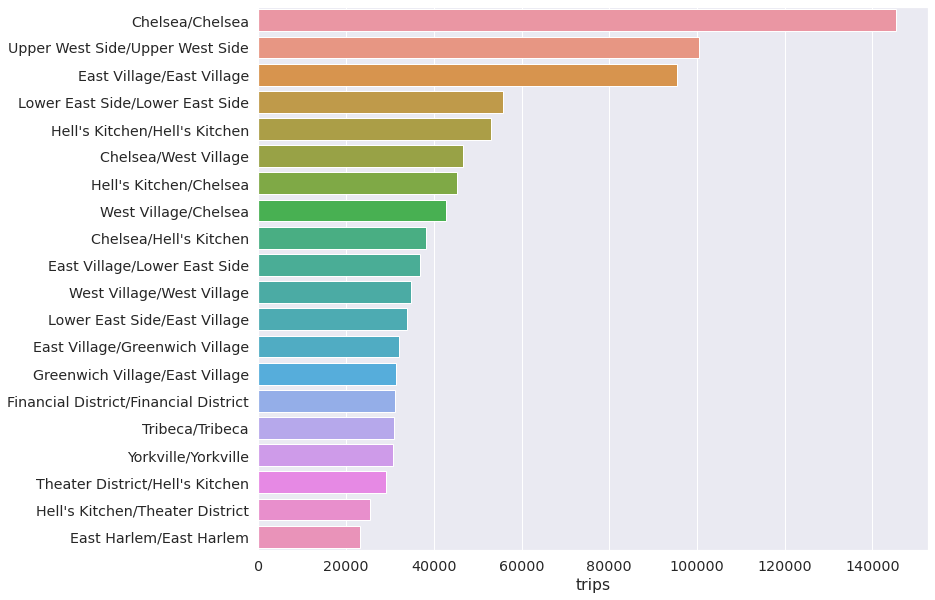

In [ ]:
names = links_Manhattan.start + '/' + links_Manhattan.end
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
sns.barplot( x=links_Manhattan.trips[:20], y=names[:20], orient="h")
plt.savefig('/content/drive/My Drive/Bike Sharing/OD neighborhood_man.png',bbox_inches='tight')

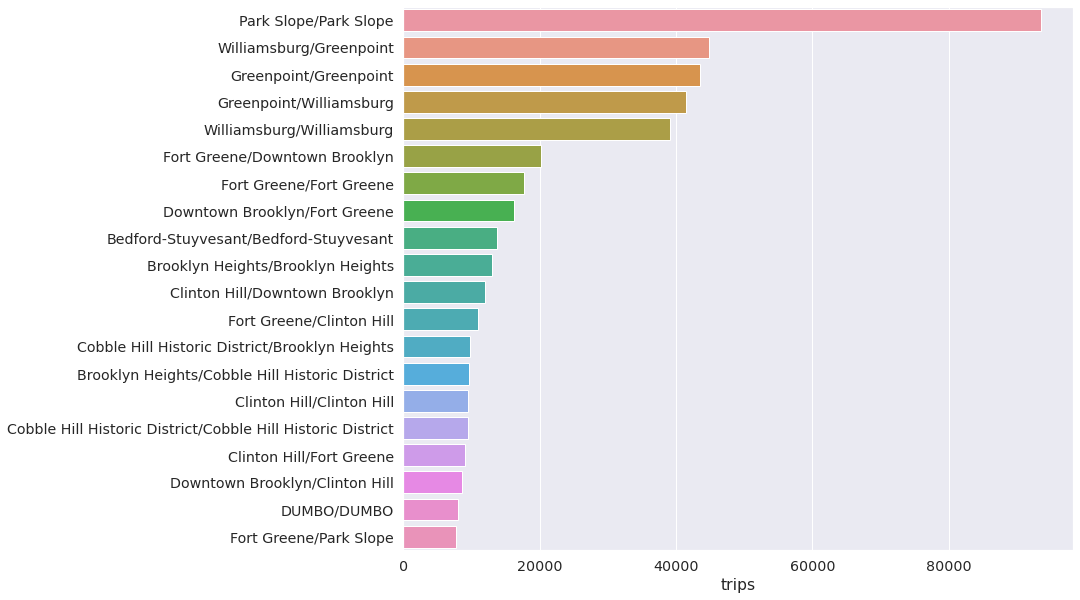

In [ ]:
names = links_Brooklyn.start + '/' + links_Brooklyn.end
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.3)
sns.barplot( x=links_Brooklyn.trips[:20], y=names[:20], orient="h")
plt.savefig('/content/drive/My Drive/Bike Sharing/OD neighborhood_brok.png',bbox_inches='tight')

In [ ]:
links_Manhattan

start                 end   trips
0               Chelsea             Chelsea  145441
1       Upper West Side     Upper West Side  100449
2          East Village        East Village   95563
3       Lower East Side     Lower East Side   55733
4        Hell's Kitchen      Hell's Kitchen   52941
...                 ...                 ...     ...
2117    Upper West Side          Nolan Park       1
2118  Flatiron District          Nolan Park       1
2119     Manhattanville  Financial District       1
2120     Manhattanville           Chinatown       1
2121         Nolan Park           Yorkville       1

[2122 rows x 3 columns]

In [ ]:
Manhattan = pd.pivot_table(links_Manhattan,index='start',values='trips',columns='end')
Brooklyn = pd.pivot_table(links_Brooklyn,index='start',values='trips',columns='end')
Brooklyn.to_csv('/content/drive/My Drive/Bike Sharing/Brooklyn OD.csv')

In [ ]:
from holoviews import opts, dim
import holoviews as hv
hv.extension('matplotlib')
hv.output(size=200)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [ ]:
chord=hv.Chord(links_Manhattan[:50])
plot = chord.opts(node_color='index', edge_color='start',label_index='index',cmap='Category10', edge_cmap='Category10' )



ValueError: ignored

In [ ]:
chord=hv.Chord(links_Brooklyn[:50])
plot = chord.opts(node_color='index', edge_color='start',label_index='index',cmap='Category10', edge_cmap='Category10' )
hv.save(plot, '/content/drive/My Drive/Bike Sharing/OD chord_brok50.png')